# Medical Examination Data Visualization

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

| Feature | Variable Type | Variable | Value Type |
|---------|---------------|----------|---------- |
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [33]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("medical_examination.csv")
df.head(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


## Add overweight column to the data

To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [3]:
# Calculate BMI
height_in_meters = df["height"] / 100
BMI = df["weight"] / (height_in_meters) ** 2

In [4]:
# function to determine if a person is overweight
def is_overweight(bmi):
    if bmi > 25:
        return 1
    else:
        return 0

In [5]:
# create a series and add the series to the dataframe
overweight = BMI.apply(lambda x: is_overweight(x))
df["overweight"] = overweight

## Normalize 'cholesterol' and 'gluc' column

 If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [6]:
def normalize_col(col):
    df[col] = df[col].apply(lambda x: 1 if x > 1 else 0)

In [7]:
normalize_col('cholesterol')
normalize_col('gluc')

## Visualization of categorical columns and split by cardio

In [8]:
cat_df = pd.melt(df, id_vars="cardio", value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

<Figure size 1800x1350 with 0 Axes>

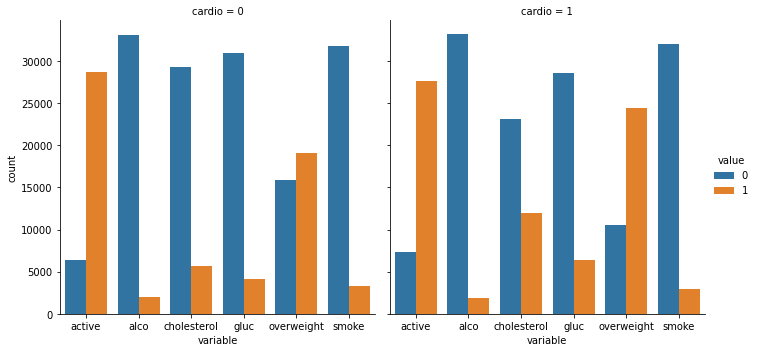

In [58]:
# categorical plot
plt.figure(figsize=(20, 15), dpi=90)
sb.catplot(data=cat_df, kind="count", x="variable", hue="value", col="cardio").set_axis_labels("variable", "total");
fig.savefig('catplot.png')

#### Heatmap

In [35]:
# clean data using filters
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))
            & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

# calculate correlation matrix
df_corr = df_heat.corr()

In [39]:
# mask to generate upper triangle 
mask = np.triu(df_corr)

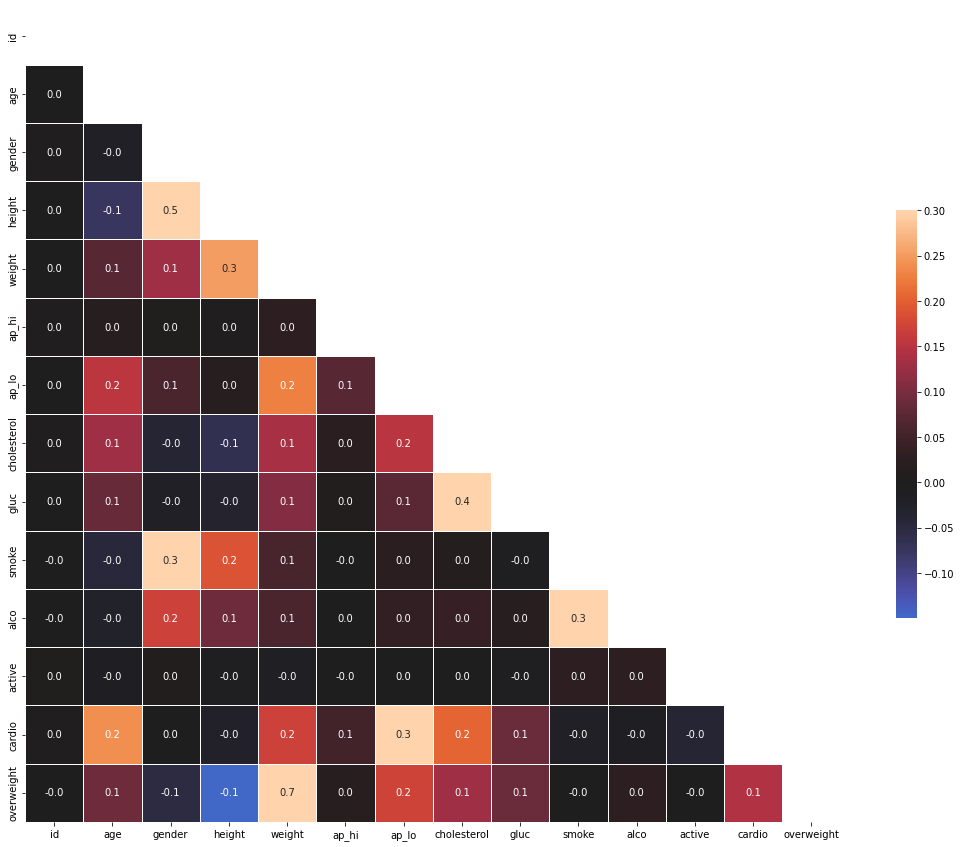

In [56]:
# generate heatmap
fig, ax = plt.subplots(figsize=(20, 15))
sb.heatmap(df_corr, mask=mask, annot=True, fmt=".1f", vmax=.3, linewidths=.5, square=True, cbar_kws = {'shrink':0.5}, center=0);
fig.savefig('heatmap.png')